# Team Vintage: What affects NBA Teams Wins

## Members: Yue Lyu, Yurui Zhang, Qixin Li, Ronghao Liu

## Abstract
Basketball is a team sport in which two teams of five players each, competing with one another to put the ball inside the opposing team’s basket. Based on common knowledge, if a team outscores its opponent, then it wins the game. NBA (National Basketball Association) is the consensus best men’s basketball league in the world. We want to dig out more factors which possibly affect the Win percentages of NBA teams aside from their field goal percentages or offensive ratings. Therefore, our study aims to determine which factors significantly affect Win percentages and thus differ a “bad” team from a “good” team. We chose five teams which have the highest average Win percentages during the past five regular seasons(2014-15 to 2018-19) as "good teams", and we chose five teams with the lowest average Win percentages and categorized them as “bad teams”. By visualizing the differences in many statistics between good teams and bad teams, we found several interesting variables: Field Goal Attempt (total shots), Offensive Rebounds (team gets the ball of its own miss), Block Field Goal Attempted (try to block on shots made), and Pace (number of possessions per 48 minutes). Bad teams on average scores higher in these four categories than good teams do. We did t-test on each of these variables and found that FGA and PACE do not differ much between good and bad teams. So we conducted multiple linear regressions between Wins, OREB and BLKA. We found the p-values of Offensive Rebounds and Block Field Goal Attempted are not significant for good or bad teams, but BLKA became significant when we apply the model on all teams. As a result, we reached a conclusion that if a NBA team wants to win more games, do not waste energy on trying to block every opponents' shot. 

## Background
Basketball is a sport played between two teams of five players each. Two teams oppose one another and trying to shoot the basketball through defender’s hoop while preventing their own hoop from being shot through. NBA (The National Basketball Association) is a men’s professional basketball league in North America which is considered the premier men’s basketball league in the world. There are 30 teams in the NBA (29 in the United States and 1 in Canada). Those teams are split into two Conferences (West and East), and are further divided into 6 Divisions (Atlantic, Central, Southeast, Northwest, Pacific, and Southwest) based on where they are located. Each year, the NBA's regular season runs from October to April, with each team playing 82 games and 8 teams with the better winning records from each Conference will go to playoffs (16 teams in total). The playoffs extend into June when the Champion team arises from the winners of each Conference. 

Every basketball player has a position on the court. There are five positions in basketball: Point Guard (who handles the ball and initiate plays), Shooting Guard (literally, shoot to score), Small Forward (can be scorer as well, usually the most important player in each team), Power Forward (set screens and grab rebounds), and Center (center of the team, simple). However, with the evolution of basketball, nowadays the distinction between positions is blurred. Players would take different positions depend on different rosters.  

In the basketball world, players are credited in many ways. But scorers are always preferable because overall basketball is a game in which the higher scoring team wins. As 3 pointer is increasingly more valued by NBA teams, scorers who specialize in shooting 3s have become more popular. On the other hand, defenders who compete for every rebound and sacrifice their body to defend and hustle are also welcomed by NBA teams. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from scipy.stats import ttest_ind

In [2]:
nba1415=pd.read_csv("//Users/yuelyu/Desktop/131-Group-Project/NBA14-15.csv")
nba1516=pd.read_csv("//Users/yuelyu/Desktop/131-Group-Project/NBA15-16.csv")
nba1617=pd.read_csv("//Users/yuelyu/Desktop/131-Group-Project/NBA16-17.csv")
nba1718=pd.read_csv("//Users/yuelyu/Desktop/131-Group-Project/NBA17-18.csv")
nba1819=pd.read_csv("//Users/yuelyu/Desktop/131-Group-Project/NBA18-19.csv")
nba1415['YEAR']="2014-15"
nba1516['YEAR']="2015-16"
nba1617['YEAR']="2016-17"
nba1718['YEAR']="2017-18"
nba1819['YEAR']="2018-19"

In [100]:
nba=pd.concat([nba1415,nba1516,nba1617,nba1718,nba1819])
nba['TEAM']=np.where(nba['TEAM']=='Los Angeles Clippers','LA Clippers',nba['TEAM'])
nba['2PM']=nba.FGM-nba['3PM']
nba['2PA']=nba.FGA-nba['3PA']
nba.head()

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,YEAR,2PM,2PA
0,Golden State Warriors,82,67,15,0.817,3946,9016,3410,7137,47.8,...,70.3,49.8,14.5,54.0,57.1,99.29,56.9,2014-15,2527,4920
1,Atlanta Hawks,82,60,22,0.732,3946,8409,3121,6699,46.6,...,69.7,48.7,15.0,52.7,56.3,94.66,54.0,2014-15,2303,4547
2,Houston Rockets,82,56,26,0.683,3961,8522,3032,6832,44.4,...,68.6,49.6,17.0,51.2,54.8,97.38,50.9,2014-15,2099,4152
3,LA Clippers,82,56,26,0.683,3946,8751,3228,6830,47.3,...,71.6,49.7,12.9,53.3,56.5,95.41,54.0,2014-15,2401,4628
4,Memphis Grizzlies,82,55,27,0.671,3981,8062,3097,6763,45.8,...,71.6,50.3,14.2,48.9,53.1,92.85,53.0,2014-15,2674,5517


(0, 6000)

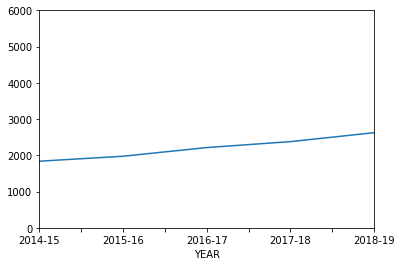

In [4]:
nba.groupby(['YEAR'])['3PA'].mean().plot()
plt.ylim(0,6000)

Over the past five Regular Seasons, NBA teams shot increasingly more 3 pointers.

(0, 6000)

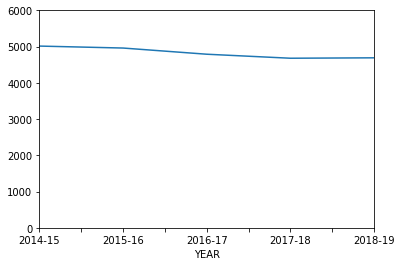

In [5]:
nba.groupby(['YEAR'])['2PA'].mean().plot()
plt.ylim(0,6000)

Though 2 point shots haven't changed as much as 3 pointers attempts, we can still see a downward slope over the past five NBA Regular Seasons. It means NBA teams are taking less two pointer attempts.

So why NBA has the trend of shooting more 3s and less 2s? We wanna see how 2 and 3 pointers made translate into Game Wins.

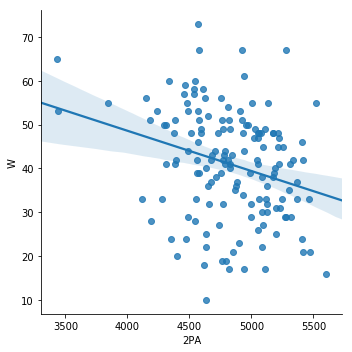

In [6]:
sns.lmplot(x='2PA',y='W',data=nba,fit_reg= True)

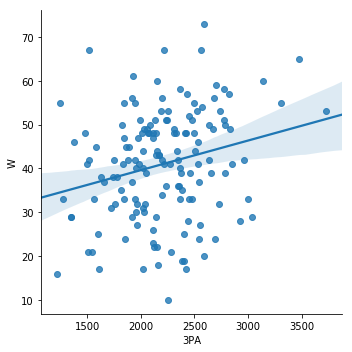

In [7]:
sns.lmplot(x='3PA',y='W',data=nba,fit_reg= True)

Linear plot shows that shooting more 3s obviously improves Wins while shooting more 2s would harm a NBA team.

In [8]:
df = pd.DataFrame({"Win": nba.W, "TwoPA":nba['2PA']})
result = smf.ols(formula="Win~TwoPA", data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    Win   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     12.44
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           0.000561
Time:                        15:49:13   Log-Likelihood:                -584.23
No. Observations:                 150   AIC:                             1172.
Df Residuals:                     148   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.3390     12.611      6.767      0.0

From the linear regression model between Win and 2PM, we can see if a NBA team made one more 2 pointer, its Game Win would decrease by 0.0092, and a p value of 0.001 suggests significance, which means shooting 2s defintely hurt a team's wins.

In [9]:
df1 = pd.DataFrame({"Win": nba.W, "ThreePA":nba['3PA']})
result1 = smf.ols(formula="Win~ThreePA", data=df1).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    Win   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     9.021
Date:                Mon, 03 Jun 2019   Prob (F-statistic):            0.00313
Time:                        15:49:13   Log-Likelihood:                -585.84
No. Observations:                 150   AIC:                             1176.
Df Residuals:                     148   BIC:                             1182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.1016      5.058      5.161      0.0

From the linear regression model between Win and 3PA, we can see if a NBA team shoot one more 3 pointer, its Game Win would increase by 0.0068, and a p value of 0.003 suggests extreme significance.

As a result, we find it easy to explain why NBA teams are taking more 3s and less 2s, becasue making one more 3 will have 0.0222 more Game Wins than making one more 2.

In [10]:
nba[['W','2PA','3PA']].corr(method='spearman')

,W,2PA,3PA
W,1.000000,-0.284186,0.225011
2PA,-0.284186,1.000000,-0.821585
3PA,0.225011,-0.821585,1.000000


And Spearman Correlations back us up that 3 pointer attempt has a positive correlation with Wins while 2 pointer attempt has a negative correlation with Wins.

But shooting more 3s doesn't necessarily mean making more 3s. We want to check if NBA teams are shooting more 3s with higher percentages during past five regular seasons, and how significantly 3P%(3 point percentage) affect Wins.

(30, 40)

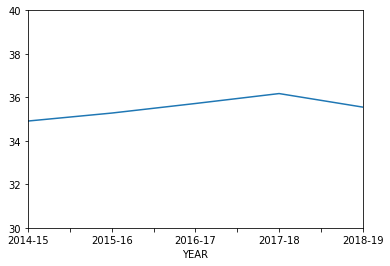

In [35]:
nba.groupby('YEAR')['3P%'].mean().plot()
plt.ylim(30,40)

The plot shows that NBA teams haven't improved much on their 3 point percentages, and the mean percentage even drops this season.

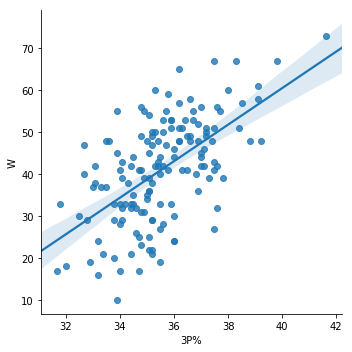

In [30]:
sns.lmplot(x='3P%',y='W',data=nba,fit_reg= True)

In [32]:
df5 = pd.DataFrame({"Win": nba.W, "ThreePointPercent":nba['3P%']})
result5 = smf.ols(formula="Win~ThreePointPercent", data=df5).fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                    Win   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     77.68
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           3.05e-15
Time:                        16:03:00   Log-Likelihood:                -558.64
No. Observations:                 150   AIC:                             1121.
Df Residuals:                     148   BIC:                             1127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -114.0214     17.60

Nonetheless, based on the linear plot and table, 3 point percentage does significantly increase chances to win, as suggested by a p value of 0. If a NBA team keeps its 3P% up by 1 percent throughout the season, it would win 4.3637 more games! 

What other factors might affect number of Wins in NBA? We want to explore more.
And thus, we chose five teams which have the highest average Win percentages during the past five regular seasons(2014-15 to 2018-19) as "good teams", and we chose five teams with the lowest average Win percentages and categorized them as “bad teams”.

In [11]:
nba.groupby('TEAM')['WIN%'].mean().sort_values(ascending=False).head(5)

TEAM
Golden State Warriors    0.7852
San Antonio Spurs        0.6780
Toronto Raptors          0.6660
Houston Rockets          0.6586
LA Clippers              0.6096
Name: WIN%, dtype: float64

In [12]:
nba.groupby('TEAM')['WIN%'].mean().sort_values(ascending=True).head(5)

TEAM
New York Knicks       0.3072
Phoenix Suns          0.3074
Los Angeles Lakers    0.3316
Brooklyn Nets         0.3632
Orlando Magic         0.3806
Name: WIN%, dtype: float64

Golden State Warriors, San Antonio Spurs, Toronto Raptors, Houston Rockets, and LA Clippers are teams with the better average Win% over the past five regular seasons, which means they perform well consistently, therefore they are good teams.

New York Knicks, Phoenix Suns, Los Angeles Lakers, Brooklyn Nets, and Orlando Magic are five teams with the lowest average Win%, therefore they are grouped into bad teams.

In [13]:
good_team=nba.loc[nba.TEAM.isin(['Golden State Warriors','San Antonio Spurs','Toronto Raptors','Houston Rockets','LA Clippers'])]
bad_team=nba.loc[nba.TEAM.isin(['New York Knicks','Phoenix Suns','Los Angeles Lakers','Brooklyn Nets','Orlando Magic'])]

Because good teams won games way more than bad teams, we want to figure out what causes the difference.

In [14]:
good_team.mean()

GP             82.00000
W              55.72000
L              26.28000
WIN%            0.67948
MIN          3959.20000
PTS          8967.76000
FGM          3289.16000
FGA          6996.76000
FG%            46.99200
3PM           889.56000
3PA          2400.48000
3P%            37.14400
FTM          1499.88000
FTA          1949.68000
FT%            77.17200
OREB          813.20000
DREB         2783.40000
REB          3596.60000
AST          1975.16000
TOV          1142.20000
STL           667.44000
BLK           441.88000
BLKA          356.76000
PF           1660.16000
PFD          1686.52000
+/-           452.20000
OFFRTG        111.04800
DEFRTG        105.52000
NETRTG          5.53200
AST%           59.87200
AST/TO          1.73360
AST RATIO      17.79600
OREB%          27.20400
DREB%          71.94400
REB%           50.08800
TOV%           14.14400
EFG%           53.34000
TS%            57.06800
PACE           97.83880
PIE            53.17600
2PM          2399.60000
2PA          459

In [15]:
bad_team.mean()

GP             82.000
W              27.720
L              54.280
WIN%            0.338
MIN          3963.400
PTS          8452.720
FGM          3169.720
FGA          7092.520
FG%            44.684
3PM           730.120
3PA          2130.000
3P%            34.256
FTM          1383.160
FTA          1822.120
FT%            75.944
OREB          857.320
DREB         2732.760
REB          3590.080
AST          1801.880
TOV          1209.560
STL           601.960
BLK           385.680
BLKA          416.600
PF           1707.680
PFD          1615.280
+/-          -412.440
OFFRTG        104.284
DEFRTG        109.252
NETRTG         -4.972
AST%           56.812
AST/TO          1.496
AST RATIO      16.380
OREB%          27.444
DREB%          71.720
REB%           49.356
TOV%           14.932
EFG%           49.816
TS%            53.512
PACE           98.184
PIE            46.732
2PM          2439.600
2PA          4962.520
dtype: float64

In [16]:
good_team.mean()-bad_team.mean()

GP             0.00000
W             28.00000
L            -28.00000
WIN%           0.34148
MIN           -4.20000
PTS          515.04000
FGM          119.44000
FGA          -95.76000
FG%            2.30800
3PM          159.44000
3PA          270.48000
3P%            2.88800
FTM          116.72000
FTA          127.56000
FT%            1.22800
OREB         -44.12000
DREB          50.64000
REB            6.52000
AST          173.28000
TOV          -67.36000
STL           65.48000
BLK           56.20000
BLKA         -59.84000
PF           -47.52000
PFD           71.24000
+/-          864.64000
OFFRTG         6.76400
DEFRTG        -3.73200
NETRTG        10.50400
AST%           3.06000
AST/TO         0.23760
AST RATIO      1.41600
OREB%         -0.24000
DREB%          0.22400
REB%           0.73200
TOV%          -0.78800
EFG%           3.52400
TS%            3.55600
PACE          -0.34520
PIE            6.44400
2PM          -40.00000
2PA         -366.24000
dtype: float64

In common sense, good teams should perform better than bad teams in each stats category except turnovers and defensive ratings. However, we found some intriguing stats where good teams score less than bad teams. For example, good teams on average have less Field Goal Attempts, Offensive Rebounds, Block Field Goal Attempts, and Pace than bad teams. 

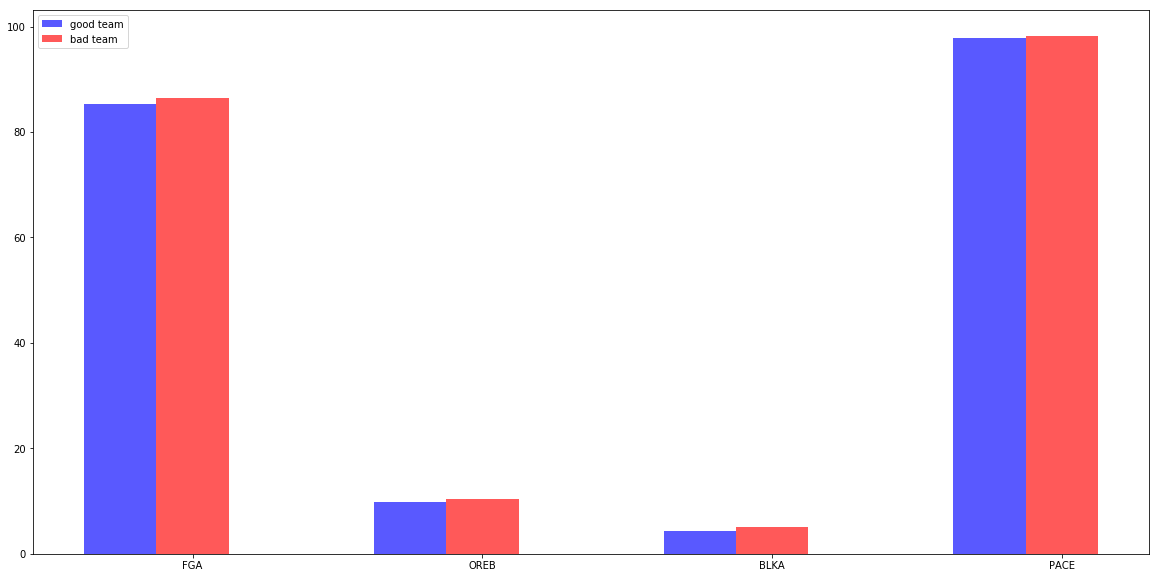

In [17]:
n_groups = 4
means_good = (85.32634,9.917073,4.350732,97.8388)
means_bad = (86.494146,10.455122,5.080488,98.184)

# create plot
fig, ax = plt.subplots(figsize=(20, 10))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.65

rects1 = plt.bar(index, means_good, bar_width,
alpha=opacity,
color='b',
label='good team')

rects2 = plt.bar(index + bar_width, means_bad, bar_width,
alpha=opacity,
color='r',
label='bad team')

plt.xticks(index + bar_width, ('FGA','OREB','BLKA','PACE'))
plt.legend()
plt.show()

Contrast with our common knowledge, bad teams on average scores higher in these four categories: Field Goal Attempt, Offensive Rebound, Block Field Goal Attempt, and Pace(possesions/48 minutes). Normally speaking, if a team has more Field Goal Attempts, it tends to score more and hence has a higher chance to outscore its opponent and thus win the game. If a team grabs more Offensive Rebound, it has more second-chance opportunities, which usually means more points as well. If a team attempts to block more shots, then it means the team is more active on the defensive end, which seems to be a good thing to us. And finally, if a team has higher pace, it means the team has more possesions to score. Nevertheless, we should use t-test to check if these differences do exist between good teams and bad teams.

T-test for FGA

In [18]:
good_FGA=good_team.FGA
bad_FGA=bad_team.FGA
t, p = ttest_ind(good_FGA, bad_FGA, equal_var=False)
print("ttest_ind: t = %g  p = %g" % (t, p))

ttest_ind: t = -1.82886  p = 0.0736533


p value=0.0736533 is not significant, therefore we cannot conclude that bad teams have more FGA than good teams. 

T-test for OREB

In [19]:
good_OREB=good_team.OREB
bad_OREB=bad_team.OREB
t, p = ttest_ind(good_OREB, bad_OREB, equal_var=False)
print("ttest_ind: t = %g  p = %g" % (t, p))

ttest_ind: t = -2.34527  p = 0.0232269


p value=0.0232269 is significant, therefore we can conclude that bad teams have more Offensive Rebounds than good teams. 

T-test for BLKA

In [20]:
good_BLKA=good_team.BLKA
bad_BLKA=bad_team.BLKA
t, p = ttest_ind(good_BLKA, bad_BLKA, equal_var=False)
print("ttest_ind: t = %g  p = %g" % (t, p))

ttest_ind: t = -3.83839  p = 0.000432915


p value=0.000432915 is extremely significant, therefore we can conclude that bad teams have more Block Field Goal Attempts than good teams.

T-test for PACE

In [21]:
good_PACE=good_team.PACE
bad_PACE=bad_team.PACE
t, p = ttest_ind(good_PACE, bad_PACE, equal_var=False)
print("ttest_ind: t = %g  p = %g" % (t, p))

ttest_ind: t = -0.435761  p = 0.664984


p value=0.664984 is not significant, therefore we cannot conclude that bad teams have higher Pace than good teams. 

In [22]:
nba[['OREB','BLKA']].corr(method='spearman')

,OREB,BLKA
OREB,1.000000,0.271713
BLKA,0.271713,1.000000


OREB and BLKA do not have high correlation, therefore we can do a multiple linera regression without concerning multicollinearity.

In [23]:
df2 = pd.DataFrame({"WIN": good_team.W, "OREB":good_team.OREB,"BLKA":good_team.BLKA, })
result2 = smf.ols(formula="WIN~OREB+BLKA", data=df2).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    WIN   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.880
Date:                Mon, 03 Jun 2019   Prob (F-statistic):              0.176
Time:                        15:49:13   Log-Likelihood:                -84.871
No. Observations:                  25   AIC:                             175.7
Df Residuals:                      22   BIC:                             179.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.5153     20.393      3.948      0.0

Based on the multiple linear regression, OREB and BLKA have no significance in determining good teams' Wins.

In [24]:
df3 = pd.DataFrame({"WIN": bad_team.W, "OREB":bad_team.OREB,"BLKA":bad_team.BLKA, })
result3 = smf.ols(formula="WIN~OREB+BLKA", data=df3).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                    WIN   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     2.054
Date:                Mon, 03 Jun 2019   Prob (F-statistic):              0.152
Time:                        15:49:13   Log-Likelihood:                -84.801
No. Observations:                  25   AIC:                             175.6
Df Residuals:                      22   BIC:                             179.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.6566     26.431      2.068      0.0

Based on the multiple linear regression, OREB and BLKA have no significance in determining bad teams' Wins as well.

In [25]:
df4 = pd.DataFrame({"WIN": nba.W, "OREB":nba.OREB,"BLKA":nba.BLKA})
result4 = smf.ols(formula="WIN~OREB+BLKA", data=df4).fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                    WIN   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     24.58
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           6.17e-10
Time:                        15:49:13   Log-Likelihood:                -568.64
No. Observations:                 150   AIC:                             1143.
Df Residuals:                     147   BIC:                             1152.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.0679      9.471      8.559      0.0

Nonetheless, if we perform the model on the whole dataset, BLKA becomes extremely significant. It means if a team attempts to block one more field goal, then it would have 0.1219 less Game Wins.

Therefore, we reached a conclusion that if a NBA team wants to win more games, do not waste energy on trying to block every opponents' shot.